In [1]:
import pandas as pd
import numpy as py
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/home/benbrew/Documents/Building_Violations_sample_50000.csv')

/home/benbrew/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
#All columns have spaces, create a function that adds underscore 
import re 

def spaces_to_snake(column_name): 
    s = re.sub(r"\s+", '_', column_name)
    return s.lower()
df.columns = [spaces_to_snake(col) for col in df.columns]

df.columns

Index([u'unnamed:_0', u'id', u'violation_last_modified_date', u'violation_date', u'violation_code', u'violation_status', u'violation_status_date', u'violation_description', u'violation_location', u'violation_inspector_comments', u'violation_ordinance', u'inspector_id', u'inspection_number', u'inspection_status', u'inspection_waived', u'inspection_category', u'department_bureau', u'address', u'property_group', u'ssa', u'latitude', u'longitude', u'location'], dtype='object')

In [7]:
df.violation_status_date = pd.to_datetime(df.violation_status_date)
df.violation_date = pd.to_datetime(df.violation_date)

In [9]:
grouped = df[['violation_date', 'inspection_category', 'id']].groupby(['violation_date', 'inspection_category'])
grouped.count()

id
violation_date inspection_category    
2006-01-01     PERIODIC             10
2006-01-02     COMPLAINT             1
               PERIODIC             50
2006-01-03     COMPLAINT            15
               PERIODIC              1
2006-01-04     COMPLAINT            32
               PERIODIC              4
2006-01-05     COMPLAINT            18
               PERIODIC              2
2006-01-06     COMPLAINT            19
               PERIODIC              5
2006-01-07     COMPLAINT             1
2006-01-09     COMPLAINT            11
               PERIODIC              7
2006-01-10     COMPLAINT            13
               PERIODIC              3
2006-01-11     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-12     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-13     COMPLAINT            18
               PERMIT                1
2006-01-14     COMPLAINT             2
2006-01-17     COMPLAINT            18
               PERIODIC              1
2006-01-18     COMPLAINT            27
               PERIODIC              6
2006-01-19     COMPLAINT            32
...                                 ..
2015-05-06     PERMIT                4
2015-05-07     COMPLAINT            17
               PERIODIC              4
               PERMIT                2
2015-05-08     COMPLAINT            10
               PERIODIC              1
               PERMIT                2
2015-05-11     COMPLAINT             8
               PERIODIC              3
               PERMIT                1
2015-05-12     COMPLAINT            11
               PERMIT                4
2015-05-13     COMPLAINT             8
               PERIODIC              4
               PERMIT                1
2015-05-14     COMPLAINT            11
               PERIODIC              4
               PERMIT                2
2015-05-15     COMPLAINT            13
               PERIODIC              2
2015-05-18     COMPLAINT             8
               PERIODIC              4
               PERMIT                2
2015-05-19     COMPLAINT             9
               PERIODIC              2
2015-05-20     COMPLAINT             8
               PERIODIC              1
               PERMIT                1
2015-05-21     COMPLAINT            11
               PERIODIC              1

[5749 rows x 1 columns]

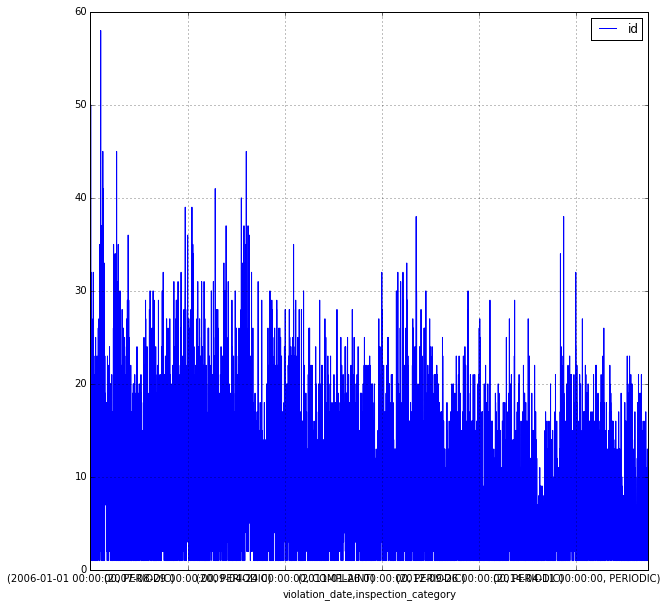

In [14]:
grouped.count().plot(figsize=(10,10))

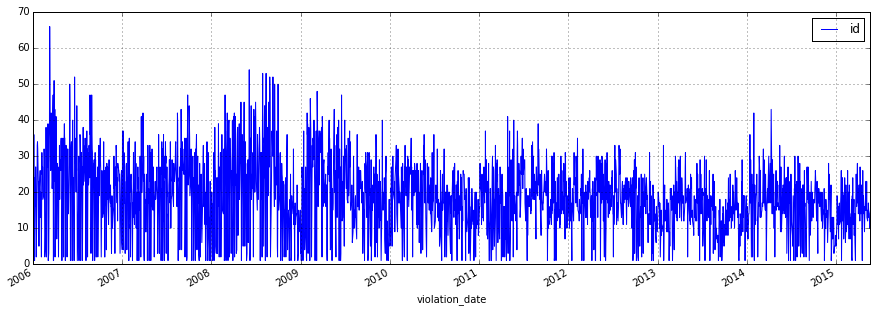

In [15]:
grouped = df[['violation_date', 'id']].groupby(['violation_date']).count().plot(figsize=(15,5))

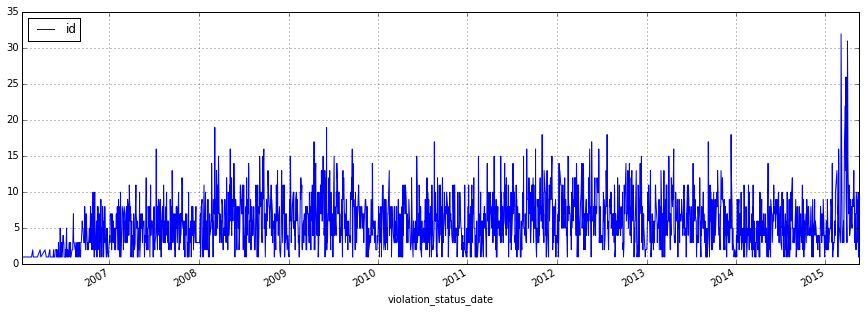

In [16]:
grouped = df[['violation_status_date', 'id']].groupby(['violation_status_date']).count().plot(figsize=(15,5))

In [29]:
grouped = df[['violation_status_date', 'id']].groupby(['violation_status_date']).count()
grouped.head()

,id
violation_status_date,
2006-01-11,1
2006-01-23,1
2006-02-15,1
2006-02-17,1
2006-02-22,2


In [30]:
#for january 2011
grouped['2011-01']

,id
violation_status_date,
2011-01-03,5
2011-01-04,8
2011-01-05,3
2011-01-06,11
2011-01-07,4
2011-01-10,3
2011-01-11,6
2011-01-12,7
2011-01-13,1


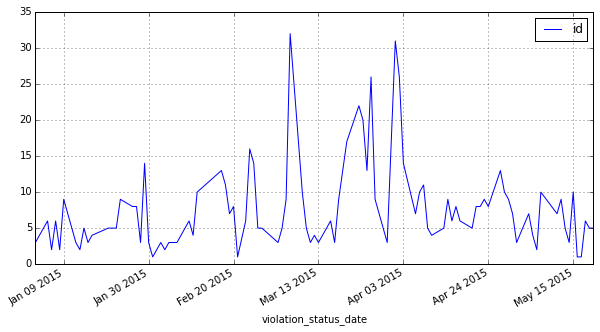

In [34]:
plot = grouped['2015-01':].plot(figsize = (10,5))

In [40]:
df1 = df[df['violation_status'] == "OPEN"]
grouped_open = df[['id', 'violation_date', 'inspection_category']].groupby(['violation_date', 'inspection_category']).count()
grouped_open.head()

id
violation_date inspection_category    
2006-01-01     PERIODIC             10
2006-01-02     COMPLAINT             1
               PERIODIC             50
2006-01-03     COMPLAINT            15
               PERIODIC              1

In [42]:
#reset index 
grouped_open.reset_index(inplace=True)

grouped_open.head()

,index,violation_date,inspection_category,id
0,0,2006-01-01,PERIODIC,10
1,1,2006-01-02,COMPLAINT,1
2,2,2006-01-02,PERIODIC,50
3,3,2006-01-03,COMPLAINT,15
4,4,2006-01-03,PERIODIC,1


In [43]:
#pivot
grouped_open_categ = grouped_open.pivot_table('id','violation_date','inspection_category')
grouped_open_categ.head()

inspection_category,COMPLAINT,PERIODIC,PERMIT,REGISTRATION
violation_date,,,,
2006-01-01,NaN,10,NaN,NaN
2006-01-02,1,50,NaN,NaN
2006-01-03,15,1,NaN,NaN
2006-01-04,32,4,NaN,NaN
2006-01-05,18,2,NaN,NaN


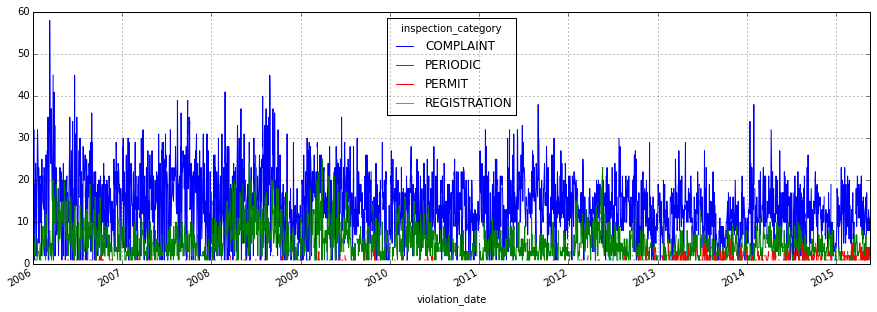

In [44]:
grouped_open_categ.plot(figsize=(15,5))

In [21]:
#stack and unstack 
grouped = df[['id', 'violation_date', 'inspection_category']].groupby(['violation_date', 'inspection_category']).count()
grouped

id
violation_date inspection_category    
2006-01-01     PERIODIC             10
2006-01-02     COMPLAINT             1
               PERIODIC             50
2006-01-03     COMPLAINT            15
               PERIODIC              1
2006-01-04     COMPLAINT            32
               PERIODIC              4
2006-01-05     COMPLAINT            18
               PERIODIC              2
2006-01-06     COMPLAINT            19
               PERIODIC              5
2006-01-07     COMPLAINT             1
2006-01-09     COMPLAINT            11
               PERIODIC              7
2006-01-10     COMPLAINT            13
               PERIODIC              3
2006-01-11     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-12     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-13     COMPLAINT            18
               PERMIT                1
2006-01-14     COMPLAINT             2
2006-01-17     COMPLAINT            18
               PERIODIC              1
2006-01-18     COMPLAINT            27
               PERIODIC              6
2006-01-19     COMPLAINT            32
...                                 ..
2015-05-06     PERMIT                4
2015-05-07     COMPLAINT            17
               PERIODIC              4
               PERMIT                2
2015-05-08     COMPLAINT            10
               PERIODIC              1
               PERMIT                2
2015-05-11     COMPLAINT             8
               PERIODIC              3
               PERMIT                1
2015-05-12     COMPLAINT            11
               PERMIT                4
2015-05-13     COMPLAINT             8
               PERIODIC              4
               PERMIT                1
2015-05-14     COMPLAINT            11
               PERIODIC              4
               PERMIT                2
2015-05-15     COMPLAINT            13
               PERIODIC              2
2015-05-18     COMPLAINT             8
               PERIODIC              4
               PERMIT                2
2015-05-19     COMPLAINT             9
               PERIODIC              2
2015-05-20     COMPLAINT             8
               PERIODIC              1
               PERMIT                1
2015-05-21     COMPLAINT            11
               PERIODIC              1

[5749 rows x 1 columns]

In [45]:
grouped_open = df1[['violation_date','violation_status','inspection_category','id']].groupby(['violation_date','violation_status','inspection_category']).count()
grouped_open.head()

id
violation_date violation_status inspection_category    
2006-01-01     OPEN             PERIODIC              2
2006-01-02     OPEN             COMPLAINT             1
                                PERIODIC             27
2006-01-03     OPEN             COMPLAINT            14
                                PERIODIC              1

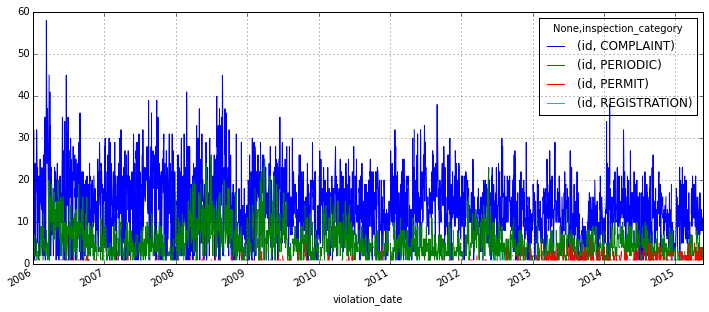

In [23]:
unstacked.plot(figsize = (12,5))


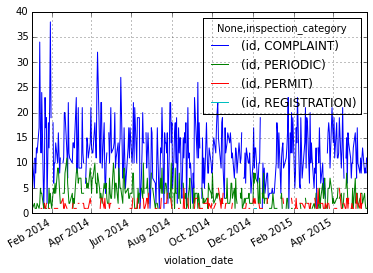

In [25]:
#just 2014 and 2015
unstacked['2014':'2015'].plot()

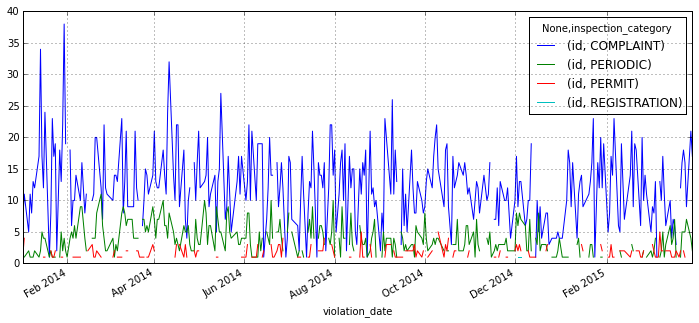

In [27]:
#jan 2014- march 2015
unstacked['2014-01':'2015-03'].plot(figsize = (12, 5))